<a href="https://colab.research.google.com/github/alexandrialim/stock-forecaster/blob/main/Learner_Notebook_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tesla (TSLA) Stock Price prediction using Facebook Prophet 

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [ ]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [ ]:
 #Initializing Plotly
import plotly.io as pio
pio.renderers.default = "colab"

## Importing the Dataset & Exploring it

In [5]:
df = pd.read_csv("TSLA 5Y data.csv")

In [ ]:
#read_csv function from pandas

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-14,21.389334,21.744667,21.234667,21.487333,21.487333,59260500
1,2018-02-15,21.633333,22.274668,21.493334,22.271334,22.271334,88693500
2,2018-02-16,22.166668,22.874666,22.109333,22.365999,22.365999,84639000
3,2018-02-20,22.298000,22.722668,22.100000,22.318001,22.318001,60141000
4,2018-02-21,22.402000,22.646000,22.211332,22.219999,22.219999,48294000
...,...,...,...,...,...,...,...
1253,2023-02-07,196.429993,197.500000,189.550003,196.809998,196.809998,186010300
1254,2023-02-08,196.100006,203.000000,194.309998,201.289993,201.289993,180673600
1255,2023-02-09,207.779999,214.000000,204.770004,207.320007,207.320007,215431400
1256,2023-02-10,202.229996,206.199997,192.889999,196.889999,196.889999,204193800


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,134.968532,138.126033,131.507517,134.881195,134.881195,1.348928e+08
std,116.956216,119.605643,113.938573,116.775897,116.775897,9.047840e+07
min,12.073333,12.445333,11.799333,11.931333,11.931333,2.940180e+07
25%,21.088166,21.509167,20.656167,21.148001,21.148001,7.636365e+07
50%,109.839332,112.174999,104.308666,108.599998,108.599998,1.041368e+08
75%,235.611672,239.940838,231.327495,236.144165,236.144165,1.643351e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [9]:
px.area(df,x="Date", y="Close")

In [10]:
px.line(df,x="Date", y="Close")

In [11]:
px.area(df,x="Date", y="Volume")

In [12]:
px.bar(df, y="Volume")

In [13]:
px.box(df, y="Close")

# Understanding Facebook Prophet

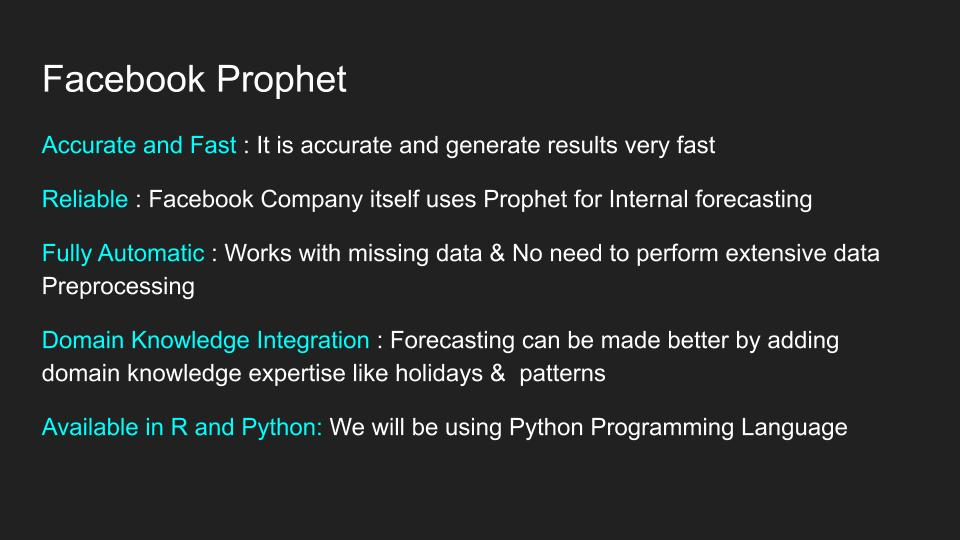

## Data Preperation

In [14]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-14,21.389334,21.744667,21.234667,21.487333,21.487333,59260500
1,2018-02-15,21.633333,22.274668,21.493334,22.271334,22.271334,88693500
2,2018-02-16,22.166668,22.874666,22.109333,22.365999,22.365999,84639000
3,2018-02-20,22.298000,22.722668,22.100000,22.318001,22.318001,60141000
4,2018-02-21,22.402000,22.646000,22.211332,22.219999,22.219999,48294000
...,...,...,...,...,...,...,...
1253,2023-02-07,196.429993,197.500000,189.550003,196.809998,196.809998,186010300
1254,2023-02-08,196.100006,203.000000,194.309998,201.289993,201.289993,180673600
1255,2023-02-09,207.779999,214.000000,204.770004,207.320007,207.320007,215431400
1256,2023-02-10,202.229996,206.199997,192.889999,196.889999,196.889999,204193800


In [17]:
dc_columns=["Date", "Close"]
new_df = pd.DataFrame(df, columns=dc_columns)

In [18]:
new_df

,Date,Close
0,2018-02-14,21.487333
1,2018-02-15,22.271334
2,2018-02-16,22.365999
3,2018-02-20,22.318001
4,2018-02-21,22.219999
...,...,...
1253,2023-02-07,196.809998
1254,2023-02-08,201.289993
1255,2023-02-09,207.320007
1256,2023-02-10,196.889999


In [20]:
prophet_df = new_df.rename(columns={"Date":"ds", "Close": "y"})

In [21]:
prophet_df

,ds,y
0,2018-02-14,21.487333
1,2018-02-15,22.271334
2,2018-02-16,22.365999
3,2018-02-20,22.318001
4,2018-02-21,22.219999
...,...,...
1253,2023-02-07,196.809998
1254,2023-02-08,201.289993
1255,2023-02-09,207.320007
1256,2023-02-10,196.889999


## Creating Facebook Prophet Model

In [22]:
m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_l6w93cy/p9oigwin.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_l6w93cy/pn4wavv6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59255', 'data', 'file=/tmp/tmp_l6w93cy/p9oigwin.json', 'init=/tmp/tmp_l6w93cy/pn4wavv6.json', 'output', 'file=/tmp/tmp_l6w93cy/prophet_modelp7rq0ylo/prophet_model-20230215013733.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:37:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:37:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [23]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [24]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-02-14,25.016410,7.018014,73.623362,25.016410,25.016410,16.057800,16.057800,16.057800,0.830240,0.830240,0.830240,15.227559,15.227559,15.227559,0.0,0.0,0.0,41.074210
1,2018-02-15,24.997105,7.945548,70.726606,24.997105,24.997105,14.781963,14.781963,14.781963,0.439303,0.439303,0.439303,14.342661,14.342661,14.342661,0.0,0.0,0.0,39.779068
2,2018-02-16,24.977800,6.512676,70.312163,24.977800,24.977800,13.251377,13.251377,13.251377,-0.062395,-0.062395,-0.062395,13.313772,13.313772,13.313772,0.0,0.0,0.0,38.229177
3,2018-02-20,24.900579,2.654195,68.344356,24.900579,24.900579,8.598280,8.598280,8.598280,0.637848,0.637848,0.637848,7.960433,7.960433,7.960433,0.0,0.0,0.0,33.498859
4,2018-02-21,24.881274,1.154070,63.063636,24.881274,24.881274,7.220495,7.220495,7.220495,0.830240,0.830240,0.830240,6.390255,6.390255,6.390255,0.0,0.0,0.0,32.101768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,2023-03-11,144.425382,99.414571,161.919577,144.072594,144.965827,-12.018943,-12.018943,-12.018943,-1.814643,-1.814643,-1.814643,-10.204300,-10.204300,-10.204300,0.0,0.0,0.0,132.406439
1284,2023-03-12,143.965021,99.804122,164.294347,143.544268,144.600265,-11.521308,-11.521308,-11.521308,-1.814641,-1.814641,-1.814641,-9.706666,-9.706666,-9.706666,0.0,0.0,0.0,132.443713
1285,2023-03-13,143.504659,102.050975,166.989978,143.041725,144.185389,-7.286295,-7.286295,-7.286295,1.784288,1.784288,1.784288,-9.070583,-9.070583,-9.070583,0.0,0.0,0.0,136.218365
1286,2023-03-14,143.044298,102.790652,164.869373,142.486441,143.788943,-7.675571,-7.675571,-7.675571,0.637848,0.637848,0.637848,-8.313419,-8.313419,-8.313419,0.0,0.0,0.0,135.368727


In [25]:
px.line(forecast, x="ds", y="yhat")

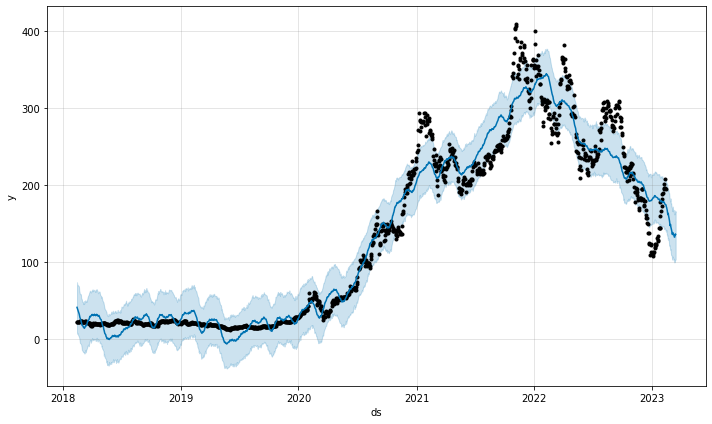

In [26]:
figure = m.plot(forecast, xlabel="ds", ylabel="y")

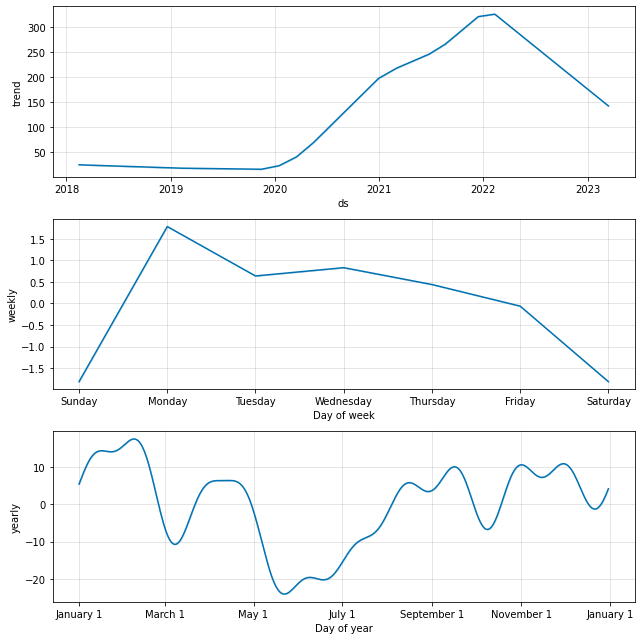

In [27]:
figure2 = m.plot_components(forecast)

##Downloading the Forecast data

In [29]:
from google.colab import files
forecast.to_csv("forecast_TSLA.csv")
files.download("forecast_TSLA.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>